# Run Correlation-Based Analyses

### Authors: Calvin Howard.

#### Last updated: July 6, 2023

Use this to assess if a correlation between a dependent variable and an independent variable is statistically significant using permutation analysis. 

Further, follow this up with a contrast analysis which sees which categorical variables have significantly different correlations from each other. 

Notes:
- To best use this notebook, you should be familar with mixed effects models

# 00 - Import CSV with All Data
**The CSV is expected to be in this format**
- ID and absolute paths to niftis are critical
```
+-----+----------------------------+--------------+--------------+--------------+
| ID  | Nifti_File_Path            | Covariate_1  | Covariate_2  | Covariate_3  |
+-----+----------------------------+--------------+--------------+--------------+
| 1   | /path/to/file1.nii.gz      | 0.5          | 1.2          | 3.4          |
| 2   | /path/to/file2.nii.gz      | 0.7          | 1.4          | 3.1          |
| 3   | /path/to/file3.nii.gz      | 0.6          | 1.5          | 3.5          |
| 4   | /path/to/file4.nii.gz      | 0.9          | 1.1          | 3.2          |
| ... | ...                        | ...          | ...          | ...          |
+-----+----------------------------+--------------+--------------+--------------+
```

In [56]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/resources/datasets/DBS_studies_influencing_memory/metadata/secondary_list.csv'
sheet = None #'master_list'

In [57]:
# Specify where you want to save your results to
out_dir = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_10/weighted_map_flipped_lesions_inverse'

In [58]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=out_dir, sheet=sheet)
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()
data_df

,study,DOI,PMID,Memory_Specific,ses,N,Memory_Outcome,Pre_Post_Memory_Effect_Size__Cohen_s_D_,Location,Location_Agg,...,all_flipped_all_datasets_weighted_r_map_average_target_in_subject,all_flipped_all_datasets_weighted_r_map_num_in_roi,all_datasets_weighted_avg_r_map_spatial_corr,all_datasets_weighted_avg_r_map_cosine,all_datasets_weighted_avg_r_map_sum,all_datasets_weighted_avg_r_map_average_subject_in_target,all_datasets_weighted_avg_r_map_average_target_in_subject,all_datasets_weighted_avg_r_map_num_in_roi,PDF_Downloaded,PDF_Path
0,Acera 2019,https://doi.org/10.1016/j.nrleng.2017.05.008,28712841,0.0,STN_BL,50.0,Impaired,-0.439462,STN,STN,...,-0.068065,0.0,0.003463,0.003377,0.570022,0.000006,0.285011,0.0,False,NaN
1,Acera 2019,https://doi.org/10.1016/j.nrleng.2017.05.008,28712841,0.0,STN_BL,50.0,Impaired,-0.589882,STN,STN,...,-0.068065,0.0,0.003463,0.003377,0.570022,0.000006,0.285011,0.0,False,NaN
2,Asahi 2014,10.2176/nmc.oa.2013-0364,24872253,0.0,STN_BL,11.0,Improved,0.872929,STN,STN,...,0.008886,0.0,0.002865,0.002779,0.469169,0.000005,0.234584,0.0,True,/Users/cu135/Partners HealthCare Dropbox/Calvi...
3,Barcia 2022,https://doi.org/10.3389/fnagi.2022.809972,35431895,1.0,Fornix_BL,1.0,Mixed,NaN,Fornix,Fornix,...,0.073740,0.0,-0.002863,-0.002940,-0.496349,-0.000005,-0.248174,0.0,True,/Users/cu135/Partners HealthCare Dropbox/Calvi...
4,Bergfeld 2017,10.1017/S0033291717000113,28179035,0.0,vALIC_BL,24.0,NaN,0.558156,vALIC,Nacc,...,-0.053898,0.0,0.002244,0.002183,0.260627,0.000003,0.260627,0.0,True,/Users/cu135/Partners HealthCare Dropbox/Calvi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,Mohan 2020,10.1016/j.brs.2020.05.009,32446925,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
102,Soloman 2018,10.1038/s41467-018-06858-y,30361627,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,/Users/cu135/Partners HealthCare Dropbox/Calvi...
103,Ezzyat 2024,10.1093/cercor/bhad427,38041253,1.0,LTC_L/R,38.0,Improved,1.273662,LTC,Cortex,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
104,Ezzyat 2024,10.1093/cercor/bhad427,38041253,1.0,LTC_L/R,38.0,Impaired,-0.321371,LTC,Cortex,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN



# 01 - Preprocess Your Data

**Handle NANs**
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [59]:
data_df.columns

Index(['study', 'DOI', 'PMID', 'Memory_Specific', 'ses', 'N', 'Memory_Outcome',
       'Pre_Post_Memory_Effect_Size__Cohen_s_D_', 'Location', 'Location_Agg',
       'List_of_Coordinates', 'Side', 'Frequency__Hz_', 'Magnitude__V_',
       'Pulse_Width__us_', 'Continuous', 'Encoding_Stim', 'Consolidation_Stim',
       'Recall_Stim', 'Closed_Loop', 'Years_Between_Measurements',
       'Age__Stdev_', 'Mean_Age', 'Percent_Female', 'Disease', 'Test',
       'Recall_Subtype', 'Sensory_Domain', 'Control_Group', 'Notes',
       'pooled_stdev', 'experimental_baseline_mean',
       'experimental_baseline_stdev', 'N_1', 'Unnamed__29',
       'experimental_post_mean', 'experimental_post_stdev',
       'experimental_post_n', 'roi_path',
       'all_flipped_all_datasets_weighted_r_map_spatial_corr',
       'all_flipped_all_datasets_weighted_r_map_cosine',
       'all_flipped_all_datasets_weighted_r_map_sum',
       'all_flipped_all_datasets_weighted_r_map_average_subject_in_target',
       'all_flipp

In [60]:
drop_list = ['Pre_Post_Memory_Effect_Size__Cohen_s_D_', 'all_datasets_weighted_avg_r_map_average_target_in_subject']

In [61]:
data_df = cal_palm.drop_nans_from_columns(columns_to_drop_from=drop_list)
data_df

,study,DOI,PMID,Memory_Specific,ses,N,Memory_Outcome,Pre_Post_Memory_Effect_Size__Cohen_s_D_,Location,Location_Agg,...,all_flipped_all_datasets_weighted_r_map_average_target_in_subject,all_flipped_all_datasets_weighted_r_map_num_in_roi,all_datasets_weighted_avg_r_map_spatial_corr,all_datasets_weighted_avg_r_map_cosine,all_datasets_weighted_avg_r_map_sum,all_datasets_weighted_avg_r_map_average_subject_in_target,all_datasets_weighted_avg_r_map_average_target_in_subject,all_datasets_weighted_avg_r_map_num_in_roi,PDF_Downloaded,PDF_Path
0,Acera 2019,https://doi.org/10.1016/j.nrleng.2017.05.008,28712841,0.0,STN_BL,50.0,Impaired,-0.439462,STN,STN,...,-0.068065,0.0,0.003463,0.003377,0.570022,5.650000e-06,0.285011,0.0,False,NaN
1,Acera 2019,https://doi.org/10.1016/j.nrleng.2017.05.008,28712841,0.0,STN_BL,50.0,Impaired,-0.589882,STN,STN,...,-0.068065,0.0,0.003463,0.003377,0.570022,5.650000e-06,0.285011,0.0,False,NaN
2,Asahi 2014,10.2176/nmc.oa.2013-0364,24872253,0.0,STN_BL,11.0,Improved,0.872929,STN,STN,...,0.008886,0.0,0.002865,0.002779,0.469169,4.650000e-06,0.234584,0.0,True,/Users/cu135/Partners HealthCare Dropbox/Calvi...
4,Bergfeld 2017,10.1017/S0033291717000113,28179035,0.0,vALIC_BL,24.0,NaN,0.558156,vALIC,Nacc,...,-0.053898,0.0,0.002244,0.002183,0.260627,2.580000e-06,0.260627,0.0,True,/Users/cu135/Partners HealthCare Dropbox/Calvi...
5,Cabrera-Montes 2025,10.1007/s10143-025-03231-8,39847189,0.0,STN_BL,20.0,Impaired,-0.354965,STN,STN,...,-0.068065,0.0,0.003463,0.003377,0.570022,5.650000e-06,0.285011,0.0,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Titiz 2017,10.7554/eLife.29515,29063831,1.0,ERC_R,9.0,Improved,0.290689,ERC,MTL,...,-0.029197,0.0,0.000404,0.000322,0.054423,5.400000e-07,0.027211,0.0,True,/Users/cu135/Partners HealthCare Dropbox/Calvi...
96,Troster 2017,10.1002/mds.26827,27753157,0.0,STN_BL,136.0,Improved,-0.027842,STN,STN,...,-0.073776,0.0,0.000343,0.000262,0.044163,4.380000e-07,0.022082,0.0,False,NaN
98,Velasco 1987,10.1111/j.1528-1157.1987.tb03668.x,3497802,0.0,CM_BL,5.0,Improved,3.115442,CM,Thalamus,...,-0.093491,0.0,0.003816,0.003729,0.629442,6.240000e-06,0.314721,0.0,False,NaN
99,Volonte 2021,10.1007/s00415-021-10430-y,33598766,0.0,STN_BL,18.0,Improved,0.650791,STN,STN,...,-0.068065,0.0,0.003463,0.003377,0.570022,5.650000e-06,0.285011,0.0,False,NaN


**Drop Row Based on Value of Column**

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

Set the parameters for dropping rows

In [62]:
data_df.columns

Index(['study', 'DOI', 'PMID', 'Memory_Specific', 'ses', 'N', 'Memory_Outcome',
       'Pre_Post_Memory_Effect_Size__Cohen_s_D_', 'Location', 'Location_Agg',
       'List_of_Coordinates', 'Side', 'Frequency__Hz_', 'Magnitude__V_',
       'Pulse_Width__us_', 'Continuous', 'Encoding_Stim', 'Consolidation_Stim',
       'Recall_Stim', 'Closed_Loop', 'Years_Between_Measurements',
       'Age__Stdev_', 'Mean_Age', 'Percent_Female', 'Disease', 'Test',
       'Recall_Subtype', 'Sensory_Domain', 'Control_Group', 'Notes',
       'pooled_stdev', 'experimental_baseline_mean',
       'experimental_baseline_stdev', 'N_1', 'Unnamed__29',
       'experimental_post_mean', 'experimental_post_stdev',
       'experimental_post_n', 'roi_path',
       'all_flipped_all_datasets_weighted_r_map_spatial_corr',
       'all_flipped_all_datasets_weighted_r_map_cosine',
       'all_flipped_all_datasets_weighted_r_map_sum',
       'all_flipped_all_datasets_weighted_r_map_average_subject_in_target',
       'all_flipp

In [63]:
column = 'Disease'  # The column you'd like to evaluate
condition = 'not'  # Thecondition to check ('equal', 'above', 'below', 'not')
value = 'Parkinson' # The value to compare against

In [64]:
data_df, other_df = cal_palm.drop_rows_based_on_value(column, condition, value)
data_df

,study,DOI,PMID,Memory_Specific,ses,N,Memory_Outcome,Pre_Post_Memory_Effect_Size__Cohen_s_D_,Location,Location_Agg,...,all_flipped_all_datasets_weighted_r_map_average_target_in_subject,all_flipped_all_datasets_weighted_r_map_num_in_roi,all_datasets_weighted_avg_r_map_spatial_corr,all_datasets_weighted_avg_r_map_cosine,all_datasets_weighted_avg_r_map_sum,all_datasets_weighted_avg_r_map_average_subject_in_target,all_datasets_weighted_avg_r_map_average_target_in_subject,all_datasets_weighted_avg_r_map_num_in_roi,PDF_Downloaded,PDF_Path
0,Acera 2019,https://doi.org/10.1016/j.nrleng.2017.05.008,28712841,0.0,STN_BL,50.0,Impaired,-0.439462,STN,STN,...,-0.068065,0.0,0.003463,0.003377,0.570022,5.650000e-06,0.285011,0.0,False,NaN
1,Acera 2019,https://doi.org/10.1016/j.nrleng.2017.05.008,28712841,0.0,STN_BL,50.0,Impaired,-0.589882,STN,STN,...,-0.068065,0.0,0.003463,0.003377,0.570022,5.650000e-06,0.285011,0.0,False,NaN
2,Asahi 2014,10.2176/nmc.oa.2013-0364,24872253,0.0,STN_BL,11.0,Improved,0.872929,STN,STN,...,0.008886,0.0,0.002865,0.002779,0.469169,4.650000e-06,0.234584,0.0,True,/Users/cu135/Partners HealthCare Dropbox/Calvi...
5,Cabrera-Montes 2025,10.1007/s10143-025-03231-8,39847189,0.0,STN_BL,20.0,Impaired,-0.354965,STN,STN,...,-0.068065,0.0,0.003463,0.003377,0.570022,5.650000e-06,0.285011,0.0,False,NaN
12,Del Bene 2025,10.1002/ana.26903,38501317,0.0,STN_L,31.0,Impaired,-0.091287,STN,STN,...,-0.059953,0.0,0.002088,0.002027,0.241999,2.400000e-06,0.241999,0.0,False,NaN
13,Del Bene 2025,10.1002/ana.26903,38501317,0.0,STN_R,31.0,Impaired,-0.047434,STN,STN,...,-0.076177,0.0,0.002810,0.002748,0.328023,3.250000e-06,0.328023,0.0,False,NaN
14,Dujardin 2001,10.1007/s004150170139,11518003,0.0,STN_BL,9.0,NaN,-0.591351,STN,STN,...,-0.068065,0.0,0.003463,0.003377,0.570022,5.650000e-06,0.285011,0.0,False,NaN
21,Follet 2010,10.1056/NEJMoa0907083,20519680,0.0,GPI_BL,147.0,Impaired,-0.278423,GPI,GPI,...,0.037751,0.0,-0.002400,-0.002477,-0.418166,-4.150000e-06,-0.209083,0.0,False,NaN
22,Follet 2010,10.1056/NEJMoa0907083,20519680,0.0,STN_BL,152.0,Impaired,-0.194145,STN,STN,...,-0.068065,0.0,0.003463,0.003377,0.570022,5.650000e-06,0.285011,0.0,False,NaN
24,Fraraccio 2008,10.1016/j.acn.2008.02.001,18394859,0.0,STN & GPI_BL,15.0,Impaired,-0.236940,STN & GPI,STN,...,-0.015157,0.0,0.000752,0.000636,0.151855,1.510000e-06,0.037964,0.0,False,NaN


Regress out a Covariate

In [65]:
for col in data_df.columns:
    
    print(col)

study
DOI
PMID
Memory_Specific
ses
N
Memory_Outcome
Pre_Post_Memory_Effect_Size__Cohen_s_D_
Location
Location_Agg
List_of_Coordinates
Side
Frequency__Hz_
Magnitude__V_
Pulse_Width__us_
Continuous
Encoding_Stim
Consolidation_Stim
Recall_Stim
Closed_Loop
Years_Between_Measurements
Age__Stdev_
Mean_Age
Percent_Female
Disease
Test
Recall_Subtype
Sensory_Domain
Control_Group
Notes
pooled_stdev
experimental_baseline_mean
experimental_baseline_stdev
N_1
Unnamed__29
experimental_post_mean
experimental_post_stdev
experimental_post_n
roi_path
all_flipped_all_datasets_weighted_r_map_spatial_corr
all_flipped_all_datasets_weighted_r_map_cosine
all_flipped_all_datasets_weighted_r_map_sum
all_flipped_all_datasets_weighted_r_map_average_subject_in_target
all_flipped_all_datasets_weighted_r_map_average_target_in_subject
all_flipped_all_datasets_weighted_r_map_num_in_roi
all_datasets_weighted_avg_r_map_spatial_corr
all_datasets_weighted_avg_r_map_cosine
all_datasets_weighted_avg_r_map_sum
all_datasets_w

In [66]:
dependent_variable_list = ['Pre_Post_Memory_Effect_Size__Cohen_s_D_']
regressors = ['Disease', 'Years_Between_Measurements']

In [41]:
for col in regressors:
    if data_df[col].dtype == 'O':  # object/categorical
        data_df[col] = data_df[col].fillna(data_df[col].mode()[0])
    else:  # numeric
        data_df[col] = data_df[col].fillna(data_df[col].mean())
data_df[regressors].isna().sum()


/var/folders/82/946tskyj68b6htgvndtppmz80000gp/T/ipykernel_37809/951581986.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df[col] = data_df[col].fillna(data_df[col].mode()[0])
/var/folders/82/946tskyj68b6htgvndtppmz80000gp/T/ipykernel_37809/951581986.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df[col] = data_df[col].fillna(data_df[col].mean())


Disease                       0
Years_Between_Measurements    0
dtype: int64

In [42]:
from calvin_utils.statistical_utils.regression_utils import RegressOutCovariates
data_df, adjusted_dep_vars_list = RegressOutCovariates.run(df=data_df, dependent_variable_list=dependent_variable_list, covariates_list=regressors)
print(adjusted_dep_vars_list)


 Formula for Pre_Post_Memory_Effect_Size__Cohen_s_D_: 
 Pre_Post_Memory_Effect_Size__Cohen_s_D_ ~ Disease + Years_Between_Measurements
['Pre_Post_Memory_Effect_Size__Cohen_s_D__residual']


/Users/cu135/Software_Local/calvin_utils_project/calvin_utils_project/calvin_utils/statistical_utils/regression_utils.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{indep_var}_residual"] = residuals


In [43]:
import numpy as np
nonzero_count = np.count_nonzero(data_df['Pre_Post_Memory_Effect_Size__Cohen_s_D__residual'])
not_nan_count = data_df['Pre_Post_Memory_Effect_Size__Cohen_s_D__residual'].notna().sum()
print(f"Nonzero count: {nonzero_count}")
print(f"Non-NaN count: {not_nan_count}")

Nonzero count: 31
Non-NaN count: 31


**Standardize Data**
- Enter Columns you Don't want to standardize into a list

In [44]:
data_df.columns

Index(['study', 'DOI', 'PMID', 'Memory_Specific', 'ses', 'N', 'Memory_Outcome',
       'Pre_Post_Memory_Effect_Size__Cohen_s_D_', 'Location', 'Location_Agg',
       'List_of_Coordinates', 'Side', 'Frequency__Hz_', 'Magnitude__V_',
       'Pulse_Width__us_', 'Continuous', 'Encoding_Stim', 'Consolidation_Stim',
       'Recall_Stim', 'Closed_Loop', 'Years_Between_Measurements',
       'Age__Stdev_', 'Mean_Age', 'Percent_Female', 'Disease', 'Test',
       'Recall_Subtype', 'Sensory_Domain', 'Control_Group', 'Notes',
       'pooled_stdev', 'experimental_baseline_mean',
       'experimental_baseline_stdev', 'N_1', 'Unnamed__29',
       'experimental_post_mean', 'experimental_post_stdev',
       'experimental_post_n', 'roi_path',
       'all_flipped_all_datasets_weighted_r_map_spatial_corr',
       'all_flipped_all_datasets_weighted_r_map_cosine',
       'all_flipped_all_datasets_weighted_r_map_sum',
       'all_flipped_all_datasets_weighted_r_map_average_subject_in_target',
       'all_flipp

In [45]:
# Remove anything you don't want to standardize
cols_not_to_standardize = ['TOTAL11']

In [46]:
# data_df = cal_palm.standardize_columns(cols_not_to_standardize)
data_df

,study,DOI,PMID,Memory_Specific,ses,N,Memory_Outcome,Pre_Post_Memory_Effect_Size__Cohen_s_D_,Location,Location_Agg,...,all_flipped_all_datasets_weighted_r_map_num_in_roi,all_datasets_weighted_avg_r_map_spatial_corr,all_datasets_weighted_avg_r_map_cosine,all_datasets_weighted_avg_r_map_sum,all_datasets_weighted_avg_r_map_average_subject_in_target,all_datasets_weighted_avg_r_map_average_target_in_subject,all_datasets_weighted_avg_r_map_num_in_roi,PDF_Downloaded,PDF_Path,Pre_Post_Memory_Effect_Size__Cohen_s_D__residual
0,Acera 2019,https://doi.org/10.1016/j.nrleng.2017.05.008,28712841,0.0,STN_BL,50.0,Impaired,-0.439462,STN,STN,...,0.0,0.003463,0.003377,0.570022,5.650000e-06,0.285011,0.0,False,NaN,-1.744537
1,Acera 2019,https://doi.org/10.1016/j.nrleng.2017.05.008,28712841,0.0,STN_BL,50.0,Impaired,-0.589882,STN,STN,...,0.0,0.003463,0.003377,0.570022,5.650000e-06,0.285011,0.0,False,NaN,-1.894957
2,Asahi 2014,10.2176/nmc.oa.2013-0364,24872253,0.0,STN_BL,11.0,Improved,0.872929,STN,STN,...,0.0,0.002865,0.002779,0.469169,4.650000e-06,0.234584,0.0,True,/Users/cu135/Partners HealthCare Dropbox/Calvi...,-0.432145
5,Cabrera-Montes 2025,10.1007/s10143-025-03231-8,39847189,0.0,STN_BL,20.0,Impaired,-0.354965,STN,STN,...,0.0,0.003463,0.003377,0.570022,5.650000e-06,0.285011,0.0,False,NaN,0.195286
12,Del Bene 2025,10.1002/ana.26903,38501317,0.0,STN_L,31.0,Impaired,-0.091287,STN,STN,...,0.0,0.002088,0.002027,0.241999,2.400000e-06,0.241999,0.0,False,NaN,-1.396361
13,Del Bene 2025,10.1002/ana.26903,38501317,0.0,STN_R,31.0,Impaired,-0.047434,STN,STN,...,0.0,0.002810,0.002748,0.328023,3.250000e-06,0.328023,0.0,False,NaN,-1.352508
14,Dujardin 2001,10.1007/s004150170139,11518003,0.0,STN_BL,9.0,NaN,-0.591351,STN,STN,...,0.0,0.003463,0.003377,0.570022,5.650000e-06,0.285011,0.0,False,NaN,-1.896425
21,Follet 2010,10.1056/NEJMoa0907083,20519680,0.0,GPI_BL,147.0,Impaired,-0.278423,GPI,GPI,...,0.0,-0.002400,-0.002477,-0.418166,-4.150000e-06,-0.209083,0.0,False,NaN,-1.377350
22,Follet 2010,10.1056/NEJMoa0907083,20519680,0.0,STN_BL,152.0,Impaired,-0.194145,STN,STN,...,0.0,0.003463,0.003377,0.570022,5.650000e-06,0.285011,0.0,False,NaN,-1.293072
24,Fraraccio 2008,10.1016/j.acn.2008.02.001,18394859,0.0,STN & GPI_BL,15.0,Impaired,-0.236940,STN & GPI,STN,...,0.0,0.000752,0.000636,0.151855,1.510000e-06,0.037964,0.0,False,NaN,-1.542014


Misc Filtering

In [75]:
data_df = data_df[data_df['Pre_Post_Memory_Effect_Size__Cohen_s_D_'].abs() <= 10]

# 02 - Perform Basic Correlation

In [76]:

data_df.columns

Index(['study', 'DOI', 'PMID', 'Memory_Specific', 'ses', 'N', 'Memory_Outcome',
       'Pre_Post_Memory_Effect_Size__Cohen_s_D_', 'Location', 'Location_Agg',
       'List_of_Coordinates', 'Side', 'Frequency__Hz_', 'Magnitude__V_',
       'Pulse_Width__us_', 'Continuous', 'Encoding_Stim', 'Consolidation_Stim',
       'Recall_Stim', 'Closed_Loop', 'Years_Between_Measurements',
       'Age__Stdev_', 'Mean_Age', 'Percent_Female', 'Disease', 'Test',
       'Recall_Subtype', 'Sensory_Domain', 'Control_Group', 'Notes',
       'pooled_stdev', 'experimental_baseline_mean',
       'experimental_baseline_stdev', 'N_1', 'Unnamed__29',
       'experimental_post_mean', 'experimental_post_stdev',
       'experimental_post_n', 'roi_path',
       'all_flipped_all_datasets_weighted_r_map_spatial_corr',
       'all_flipped_all_datasets_weighted_r_map_cosine',
       'all_flipped_all_datasets_weighted_r_map_sum',
       'all_flipped_all_datasets_weighted_r_map_average_subject_in_target',
       'all_flipp

In [77]:

# # Create delta columns for each variable
# y_cols = [
#     'ADASInstructionsScore',
#     'ADASDelayedRecallTotalScore',
#     'ADASRecognitionTable1Score',
#     'ADASCancellationReminders'
# ]

# for base in y_cols:
#     base_col = f"{base}_Baseline"
#     m1_col = f"{base}_Month_1"
#     m12_col = f"{base}_Month_12"
#     m24_col = f"{base}_Month_24"
#     delta1_col = f"{base}_Delta1"
#     delta12_col = f"{base}_Delta12"
#     delta24_col = f"{base}_Delta24"
#     # Baseline - Month 1
#     if base_col in data_df.columns and m1_col in data_df.columns:
#         data_df[delta1_col] = data_df[m1_col] - data_df[base_col]
#     # Baseline - Month 12
#     if base_col in data_df.columns and m12_col in data_df.columns:
#         data_df[delta12_col] = data_df[m12_col] - data_df[base_col]
#     # Baseline - Month 24
#     if base_col in data_df.columns and m24_col in data_df.columns:
#         data_df[delta24_col] = data_df[m24_col] - data_df[base_col]

# # y_col = 'ADASInstructionsScore_Month_24'
# # y_col = 'ADASDelayedRecallTotalScore_Month_24'
# y_col = 'ADASRecognitionTable1Score_Month_24'
# y_col = 'ADASCancellationReminders_Month_24'


In [78]:
data_df.columns

Index(['study', 'DOI', 'PMID', 'Memory_Specific', 'ses', 'N', 'Memory_Outcome',
       'Pre_Post_Memory_Effect_Size__Cohen_s_D_', 'Location', 'Location_Agg',
       'List_of_Coordinates', 'Side', 'Frequency__Hz_', 'Magnitude__V_',
       'Pulse_Width__us_', 'Continuous', 'Encoding_Stim', 'Consolidation_Stim',
       'Recall_Stim', 'Closed_Loop', 'Years_Between_Measurements',
       'Age__Stdev_', 'Mean_Age', 'Percent_Female', 'Disease', 'Test',
       'Recall_Subtype', 'Sensory_Domain', 'Control_Group', 'Notes',
       'pooled_stdev', 'experimental_baseline_mean',
       'experimental_baseline_stdev', 'N_1', 'Unnamed__29',
       'experimental_post_mean', 'experimental_post_stdev',
       'experimental_post_n', 'roi_path',
       'all_flipped_all_datasets_weighted_r_map_spatial_corr',
       'all_flipped_all_datasets_weighted_r_map_cosine',
       'all_flipped_all_datasets_weighted_r_map_sum',
       'all_flipped_all_datasets_weighted_r_map_average_subject_in_target',
       'all_flipp

In [99]:
x_col = 'all_flipped_all_datasets_weighted_r_map_cosine'
y_col = 'Pre_Post_Memory_Effect_Size__Cohen_s_D_'

In [91]:
# data_df['xab'] = data_df[x_col].abs()
# data_df['yab'] = data_df[y_col].abs()

In [92]:
# x_col = 'xab'
# y_col = 'yab'

In [93]:
out_dir = None

In [95]:
filtered_df = data_df[~((data_df[x_col] > 0) & (data_df[y_col] < -0.9))]
filtered_df

,study,DOI,PMID,Memory_Specific,ses,N,Memory_Outcome,Pre_Post_Memory_Effect_Size__Cohen_s_D_,Location,Location_Agg,...,all_flipped_all_datasets_weighted_r_map_average_target_in_subject,all_flipped_all_datasets_weighted_r_map_num_in_roi,all_datasets_weighted_avg_r_map_spatial_corr,all_datasets_weighted_avg_r_map_cosine,all_datasets_weighted_avg_r_map_sum,all_datasets_weighted_avg_r_map_average_subject_in_target,all_datasets_weighted_avg_r_map_average_target_in_subject,all_datasets_weighted_avg_r_map_num_in_roi,PDF_Downloaded,PDF_Path
0,Acera 2019,https://doi.org/10.1016/j.nrleng.2017.05.008,28712841,0.0,STN_BL,50.0,Impaired,-0.439462,STN,STN,...,-0.068065,0.0,0.003463,0.003377,0.570022,5.650000e-06,0.285011,0.0,False,NaN
1,Acera 2019,https://doi.org/10.1016/j.nrleng.2017.05.008,28712841,0.0,STN_BL,50.0,Impaired,-0.589882,STN,STN,...,-0.068065,0.0,0.003463,0.003377,0.570022,5.650000e-06,0.285011,0.0,False,NaN
2,Asahi 2014,10.2176/nmc.oa.2013-0364,24872253,0.0,STN_BL,11.0,Improved,0.872929,STN,STN,...,0.008886,0.0,0.002865,0.002779,0.469169,4.650000e-06,0.234584,0.0,True,/Users/cu135/Partners HealthCare Dropbox/Calvi...
5,Cabrera-Montes 2025,10.1007/s10143-025-03231-8,39847189,0.0,STN_BL,20.0,Impaired,-0.354965,STN,STN,...,-0.068065,0.0,0.003463,0.003377,0.570022,5.650000e-06,0.285011,0.0,False,NaN
12,Del Bene 2025,10.1002/ana.26903,38501317,0.0,STN_L,31.0,Impaired,-0.091287,STN,STN,...,-0.059953,0.0,0.002088,0.002027,0.241999,2.400000e-06,0.241999,0.0,False,NaN
13,Del Bene 2025,10.1002/ana.26903,38501317,0.0,STN_R,31.0,Impaired,-0.047434,STN,STN,...,-0.076177,0.0,0.002810,0.002748,0.328023,3.250000e-06,0.328023,0.0,False,NaN
14,Dujardin 2001,10.1007/s004150170139,11518003,0.0,STN_BL,9.0,NaN,-0.591351,STN,STN,...,-0.068065,0.0,0.003463,0.003377,0.570022,5.650000e-06,0.285011,0.0,False,NaN
21,Follet 2010,10.1056/NEJMoa0907083,20519680,0.0,GPI_BL,147.0,Impaired,-0.278423,GPI,GPI,...,0.037751,0.0,-0.002400,-0.002477,-0.418166,-4.150000e-06,-0.209083,0.0,False,NaN
22,Follet 2010,10.1056/NEJMoa0907083,20519680,0.0,STN_BL,152.0,Impaired,-0.194145,STN,STN,...,-0.068065,0.0,0.003463,0.003377,0.570022,5.650000e-06,0.285011,0.0,False,NaN
24,Fraraccio 2008,10.1016/j.acn.2008.02.001,18394859,0.0,STN & GPI_BL,15.0,Impaired,-0.236940,STN & GPI,STN,...,-0.015157,0.0,0.000752,0.000636,0.151855,1.510000e-06,0.037964,0.0,False,NaN


<Figure size 432x432 with 0 Axes>

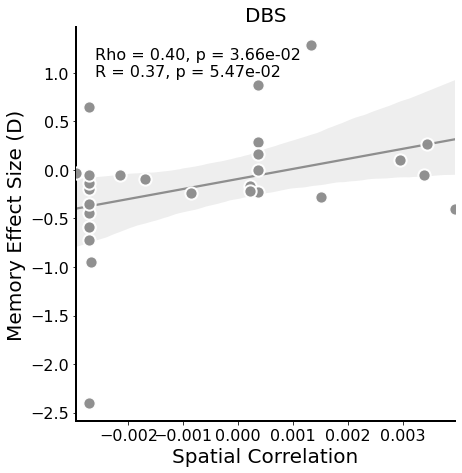

In [100]:
from calvin_utils.statistical_utils.scatterplot import simple_scatter
simple_scatter(filtered_df, x_col, y_col, 'DBS', 
               x_label="Spatial Correlation",
               y_label='Memory Effect Size (D)',
               out_dir=out_dir, flip_axes=False)

In [84]:
out_dir

# Correlate Variable with All Other Variables

In [26]:
x_col = 'flipped_lesions_all_datasets_weighted_avg_r_map_cosine'

In [27]:
from calvin_utils.statistical_utils.correlation_barplot import CorrelationBarPlot
plotter = CorrelationBarPlot(data_df, x_col=x_col, method="spearman")
corr_series = plotter.run(save_path=None)

KeyError: 'flipped_lesions_all_datasets_weighted_avg_r_map_cosine'

Focus on correlations above a threhsold

In [ ]:
strong_corrs = plotter.plot_threshold(0.3)      # |r| ≥ 0.4 plot